In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
#### Visualizing Gini Impurity range


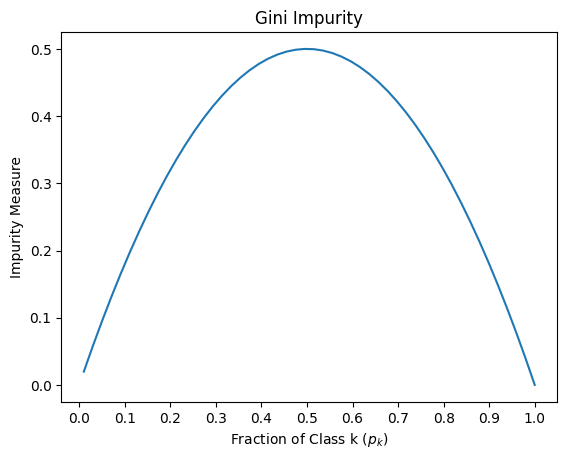

In [2]:
#A figure is created to show Gini ımpurity measures
plt.figure()
x = np.linspace(0.01,1)
y = 1 - (x*x) - (1-x)*(1-x)
plt.plot(x,y)
plt.title('Gini Impurity')
plt.xlabel("Fraction of Class k ($p_k$)")
plt.ylabel("Impurity Measure")
plt.xticks(np.arange(0,1.1,0.1))

plt.show()

In [3]:
# Defining a simple dataset
attribute_names =  ['age', 'income','student', 'credit_rate']
class_name = 'default'
data1 ={
    'age' : ['youth', 'youth', 'middle_age', 'senior', 'senior', 'senior','middle_age', 'youth', 'youth', 'senior', 'youth', 'middle_age','middle_age', 'senior'],
    'income' : ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium','low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student' : ['no','no','no','no','yes','yes','yes','no','yes','yes','yes','no','yes','no'],
    'credit_rate' : ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair','excellent', 'excellent', 'fair', 'excellent'],
    'default' : ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes','yes', 'yes', 'yes', 'no']
}
df1 = pd.DataFrame (data1, columns=data1.keys())
print(df1)

           age  income student credit_rate default
0        youth    high      no        fair      no
1        youth    high      no   excellent      no
2   middle_age    high      no        fair     yes
3       senior  medium      no        fair     yes
4       senior     low     yes        fair     yes
5       senior     low     yes   excellent      no
6   middle_age     low     yes   excellent     yes
7        youth  medium      no        fair      no
8        youth     low     yes        fair     yes
9       senior  medium     yes        fair     yes
10       youth  medium     yes   excellent     yes
11  middle_age  medium      no   excellent     yes
12  middle_age    high     yes        fair     yes
13      senior  medium      no   excellent      no


In [4]:
# STEP 1: Calculate gini(D)
def gini_impurity (value_counts):
    n = value_counts.sum()
    p_sum = 0
    for key in value_counts.keys():
        p_sum = p_sum  +  (value_counts[key] / n ) * (value_counts[key] / n )
    gini = 1 - p_sum
    return gini

class_value_counts = df1[class_name].value_counts()
print(f'Number of samples in each class is:\n{class_value_counts}')

gini_class = gini_impurity(class_value_counts)
print(f'\nGini Impurity of the class is {gini_class:.3f}')

Number of samples in each class is:
yes    9
no     5
Name: default, dtype: int64

Gini Impurity of the class is 0.459


In [5]:
# STEP 2:
# Calculating  gini impurity for the attiributes
def gini_split_a(attribute_name):
    attribute_values = df1[attribute_name].value_counts()
    gini_A = 0
    for key in attribute_values.keys():
        df_k = df1[class_name][df1[attribute_name] == key].value_counts()
        n_k = attribute_values[key]
        n = df1.shape[0]
        gini_A = gini_A + (( n_k / n) * gini_impurity(df_k))
    return gini_A

gini_attiribute ={}
for key in attribute_names:
    gini_attiribute[key] = gini_split_a(key)
    print(f'Gini for {key} is {gini_attiribute[key]:.3f}')

Gini for age is 0.343
Gini for income is 0.440
Gini for student is 0.367
Gini for credit_rate is 0.429


In [6]:
# STEP 3:
# Compute Gini gain values to find the best split
# An attribute has maximum Gini gain is selected for splitting.

min_value = min(gini_attiribute.values())
print('The minimum value of Gini Impurity : {0:.3} '.format(min_value))
print('The maximum value of Gini Gain     : {0:.3} '.format(1-min_value))

selected_attribute = min(gini_attiribute.keys())
print('The selected attiribute is: ', selected_attribute)

The minimum value of Gini Impurity : 0.343 
The maximum value of Gini Gain     : 0.657 
The selected attiribute is:  age


### Example

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
from matplotlib import pyplot as plt

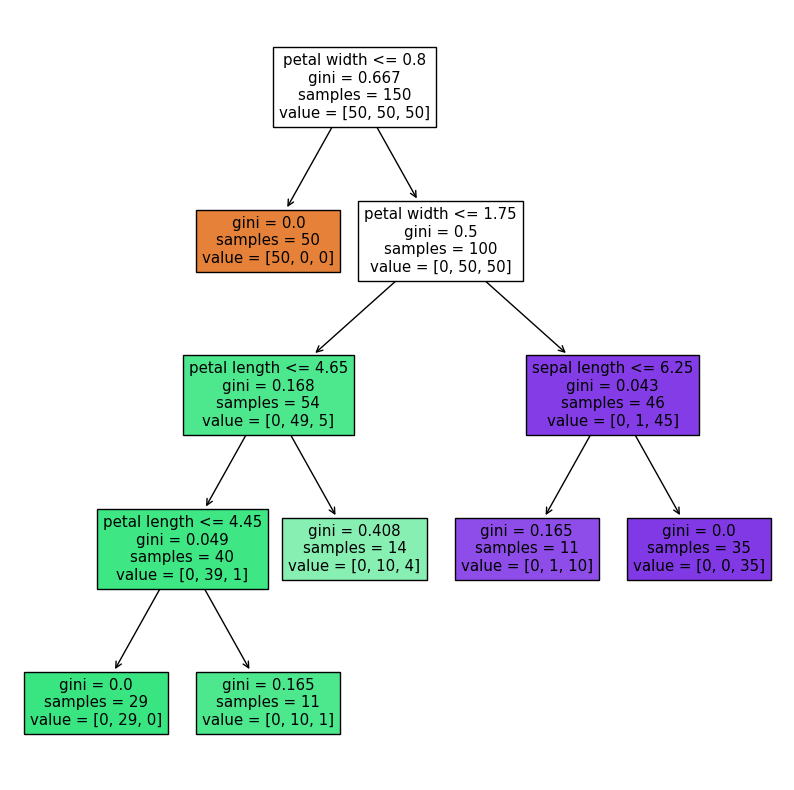

In [4]:
dataset = load_iris()
X = dataset.data
y = dataset.target

classifier = tree.DecisionTreeClassifier(criterion="gini",
                                         max_depth=4, min_samples_leaf=10)
classifier.fit(X,y)
fig, ax = plt.subplots(figsize=(10,10))
tree.plot_tree(classifier,ax=ax, feature_names=["sepal length", "sepal width",
                                                "petal length", "petal width"],
                                                 filled=True)
plt.show()